# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

Video about [GAN](https://www.youtube.com/watch?v=X1mUN6dD8uE)

How to [Train a GAN](https://github.com/soumith/ganhacks)

How to to select the [batch_size vs the number of epochs](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)

GAN [stability](http://www.araya.org/archives/1183)

MNIST [GAN with Keras}(https://medium.com/towards-data-science/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)

DCGAN [here](https://github.com/yihui-he/GAN-MNIST), and [here](https://github.com/carpedm20/DCGAN-tensorflow)

DiscoGAN, [Discover Cross-Domain Relations with Generative Adversarial Networks](https://github.com/carpedm20/DiscoGAN-pytorch)

beta1 [values](https://arxiv.org/pdf/1511.06434.pdf)

[WGAN](https://paper.dropbox.com/doc/Wasserstein-GAN-GvU0p2V9ThzdwY3BbhoP7)

Good articles [here](https://blog.openai.com/generative-models/), and [here](https://medium.com/@ageitgey/abusing-generative-adversarial-networks-to-make-8-bit-pixel-art-e45d9b96cee7)

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

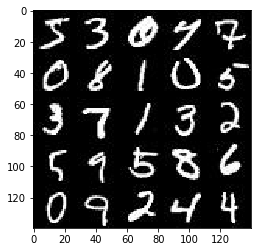

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

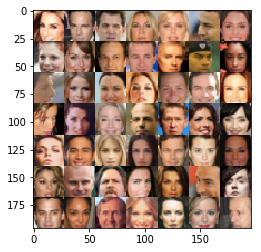

In [3]:
show_n_images = 50

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, lr

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "C:\\Users\\Adam\\Anaconda3\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "C:\\Users\\Adam\\Anaconda3\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "C:\\Users\\Adam\\Anaconda3\\lib\\site-packages\\ipykernel\\__main__.py", line 3, in <module>\n    app.launch_new_instance()', 'File "C:\\Users\\Adam\\Anaconda3\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start()', 'File "C:\\Users\\Adam\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "C:\\Users\\Adam\\Anaconda3\\lib\\site-packages\\zmq\\eventloop\\ioloop.py", li

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :param alpha: Used to control the leaky relu
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 5*5*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 5, 5, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=1, padding='valid')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
    
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [21]:
import numpy as np


def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    # Including real label smoothing to the loss calculation
    # http://www.inference.vc/instance-noise-a-trick-for-stabilising-gan-training/
    # https://github.com/soumith/ganhacks#6-use-soft-and-noisy-labels
    # Suggesting is for numbers between 0.7 and 1.2, after 1.
    smooth = np.random.uniform(0.1, 0.3)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))

    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [22]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, 
          data_shape, data_image_mode, print_every=100, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of ecpochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    class GAN:
        def __init__(self, image_width, image_height, image_channels, 
                     z_dim, learning_rate, alpha=0.2, beta1=0.5):
            # Trying to avoid "Nesting violated for default stack of %s objects"
            # tf.reset_default_graph()

            self.input_real, self.input_z, self.lr = model_inputs(image_width, image_height, image_channels, z_dim)

            self.d_loss, self.g_loss = model_loss(self.input_real, self.input_z,
                                                  image_channels)

            self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)

    # Create the network
    net = GAN(data_shape[1], data_shape[2], data_shape[3], z_dim, learning_rate, beta1=beta1)

    # Used during show generator output
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    
    # To be used when running session
    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Rescale batch_image data from [-0.5, 0.5] to [-1, 1] as we are using tanh activation
                batch_images *= 2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: batch_images, net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: batch_images})
                    train_loss_g = net.g_loss.eval({net.input_z: batch_z})

                    print("Epoch {}/{}   ".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:6.3f} ".format(train_loss_d),
                          "Generator Loss: {:6.3f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess=sess,
                                          n_images=16,
                                          input_z=net.input_z,
                                          out_channel_dim=data_shape[3],
                                          image_mode=data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2    Discriminator Loss:  0.770  Generator Loss:  3.074


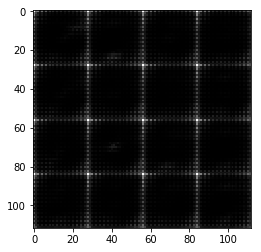

Epoch 1/2    Discriminator Loss:  1.033  Generator Loss:  1.782


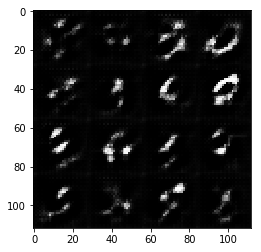

Epoch 1/2    Discriminator Loss:  1.554  Generator Loss:  0.486


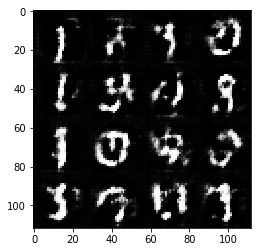

Epoch 1/2    Discriminator Loss:  1.221  Generator Loss:  0.746


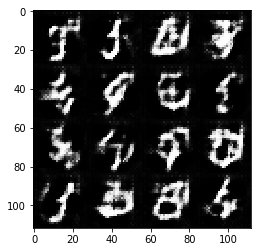

Epoch 1/2    Discriminator Loss:  1.108  Generator Loss:  0.841


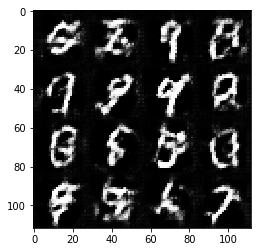

Epoch 1/2    Discriminator Loss:  1.254  Generator Loss:  0.753


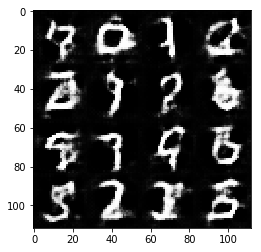

Epoch 1/2    Discriminator Loss:  1.035  Generator Loss:  1.015


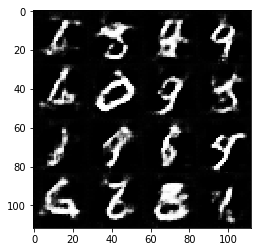

Epoch 1/2    Discriminator Loss:  1.490  Generator Loss:  0.472


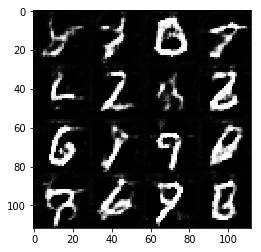

Epoch 1/2    Discriminator Loss:  0.954  Generator Loss:  1.159


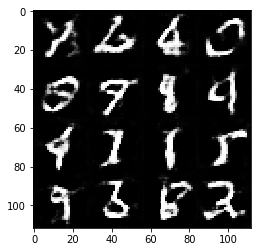

Epoch 1/2    Discriminator Loss:  1.829  Generator Loss:  0.339


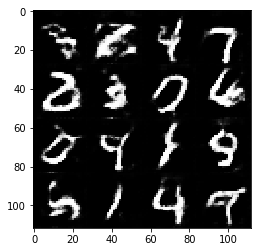

Epoch 1/2    Discriminator Loss:  0.974  Generator Loss:  1.349


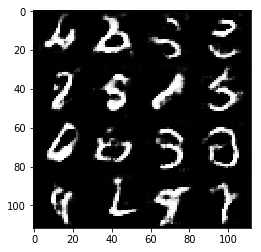

Epoch 1/2    Discriminator Loss:  0.811  Generator Loss:  1.396


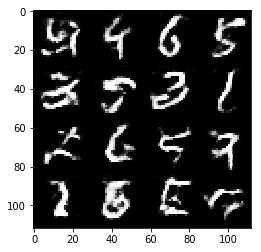

Epoch 1/2    Discriminator Loss:  1.438  Generator Loss:  0.557


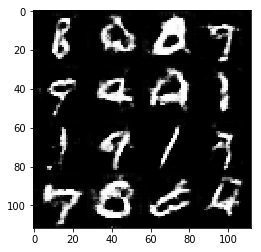

Epoch 1/2    Discriminator Loss:  1.589  Generator Loss:  0.446


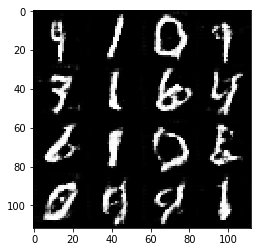

Epoch 1/2    Discriminator Loss:  0.869  Generator Loss:  1.654


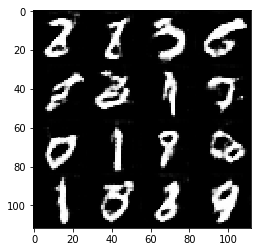

Epoch 1/2    Discriminator Loss:  1.323  Generator Loss:  0.624


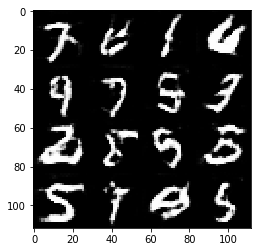

Epoch 1/2    Discriminator Loss:  0.887  Generator Loss:  1.240


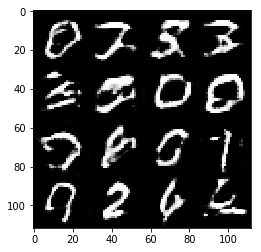

Epoch 1/2    Discriminator Loss:  0.770  Generator Loss:  1.657


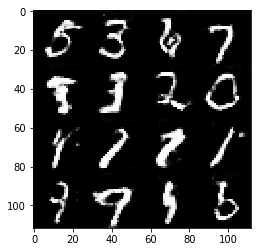

Epoch 2/2    Discriminator Loss:  0.933  Generator Loss:  1.311


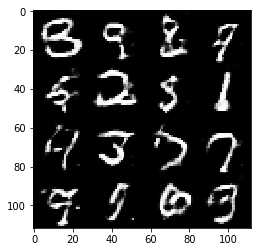

Epoch 2/2    Discriminator Loss:  0.953  Generator Loss:  1.601


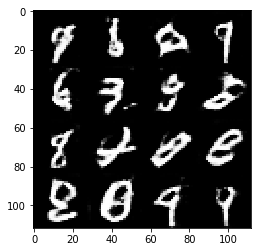

Epoch 2/2    Discriminator Loss:  0.969  Generator Loss:  1.128


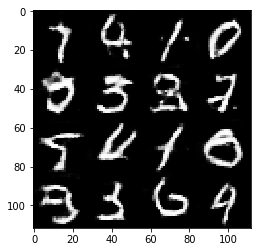

Epoch 2/2    Discriminator Loss:  0.776  Generator Loss:  1.324


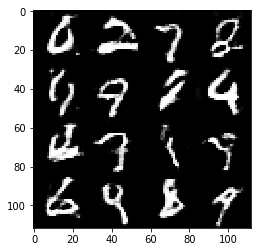

Epoch 2/2    Discriminator Loss:  0.746  Generator Loss:  1.483


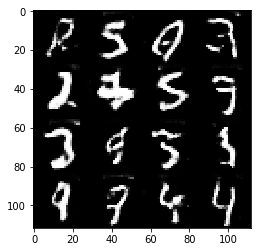

Epoch 2/2    Discriminator Loss:  1.531  Generator Loss:  0.622


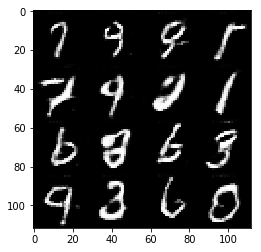

Epoch 2/2    Discriminator Loss:  1.080  Generator Loss:  0.800


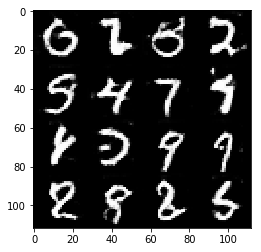

Epoch 2/2    Discriminator Loss:  0.805  Generator Loss:  2.779


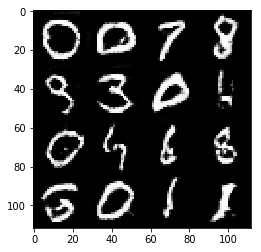

Epoch 2/2    Discriminator Loss:  1.117  Generator Loss:  0.868


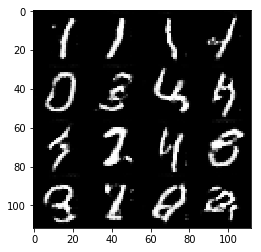

Epoch 2/2    Discriminator Loss:  0.984  Generator Loss:  0.983


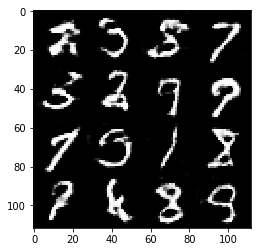

Epoch 2/2    Discriminator Loss:  1.054  Generator Loss:  2.425


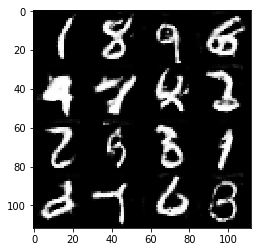

Epoch 2/2    Discriminator Loss:  0.775  Generator Loss:  1.377


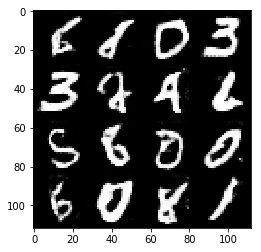

Epoch 2/2    Discriminator Loss:  0.823  Generator Loss:  1.261


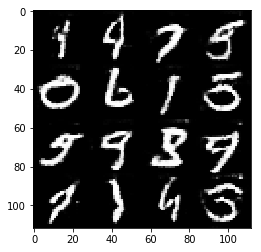

Epoch 2/2    Discriminator Loss:  0.807  Generator Loss:  2.950


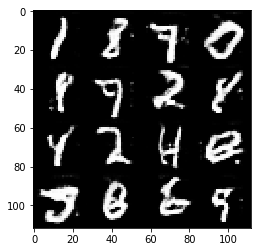

Epoch 2/2    Discriminator Loss:  0.750  Generator Loss:  1.303


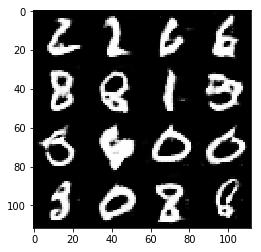

Epoch 2/2    Discriminator Loss:  0.869  Generator Loss:  1.167


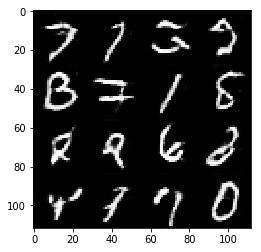

Epoch 2/2    Discriminator Loss:  1.015  Generator Loss:  0.983


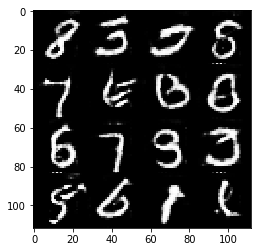

Epoch 2/2    Discriminator Loss:  0.621  Generator Loss:  1.866


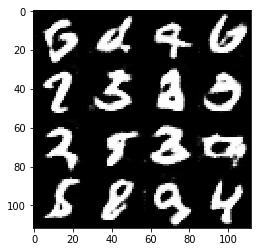

Epoch 2/2    Discriminator Loss:  0.879  Generator Loss:  1.252


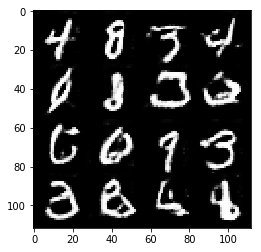

In [25]:
batch_size = 32
z_dim = 128
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1    Discriminator Loss:  1.601  Generator Loss:  3.346


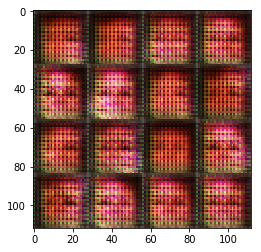

Epoch 1/1    Discriminator Loss:  1.475  Generator Loss:  0.806


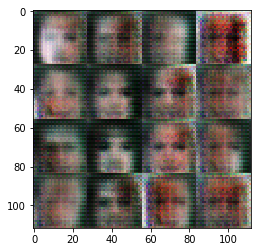

Epoch 1/1    Discriminator Loss:  1.301  Generator Loss:  1.976


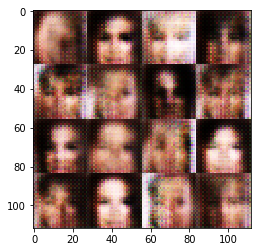

Epoch 1/1    Discriminator Loss:  1.546  Generator Loss:  0.536


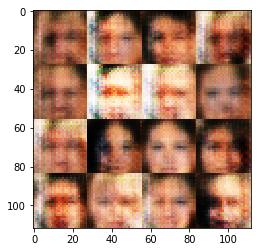

Epoch 1/1    Discriminator Loss:  1.245  Generator Loss:  0.739


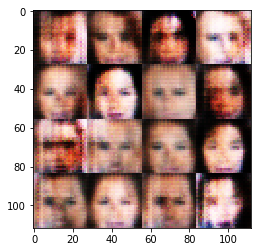

Epoch 1/1    Discriminator Loss:  1.040  Generator Loss:  0.942


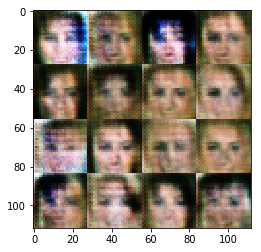

Epoch 1/1    Discriminator Loss:  1.327  Generator Loss:  0.769


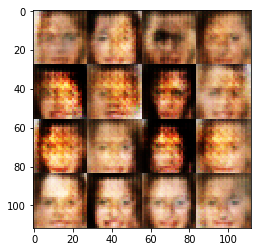

Epoch 1/1    Discriminator Loss:  1.674  Generator Loss:  0.442


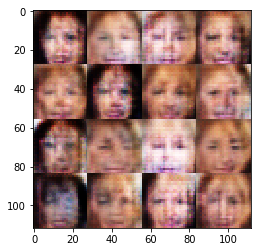

Epoch 1/1    Discriminator Loss:  0.984  Generator Loss:  1.620


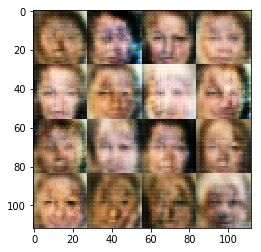

Epoch 1/1    Discriminator Loss:  1.491  Generator Loss:  0.733


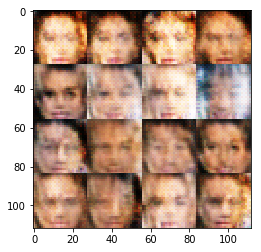

Epoch 1/1    Discriminator Loss:  1.006  Generator Loss:  1.140


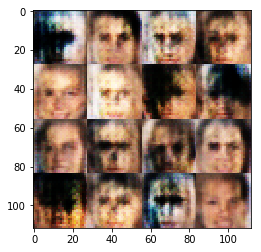

Epoch 1/1    Discriminator Loss:  0.868  Generator Loss:  2.041


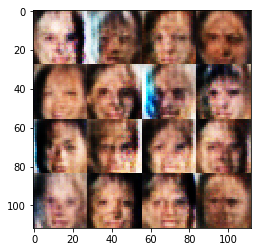

Epoch 1/1    Discriminator Loss:  1.282  Generator Loss:  0.728


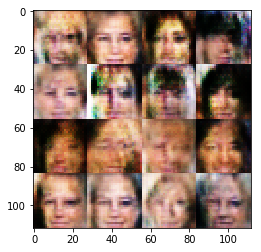

Epoch 1/1    Discriminator Loss:  1.125  Generator Loss:  0.830


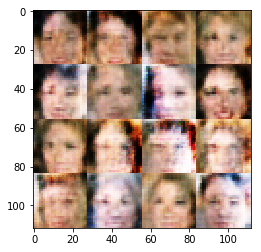

Epoch 1/1    Discriminator Loss:  1.299  Generator Loss:  0.837


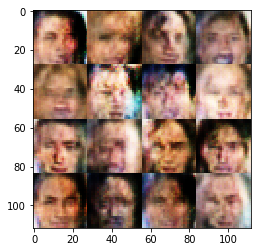

Epoch 1/1    Discriminator Loss:  1.266  Generator Loss:  0.684


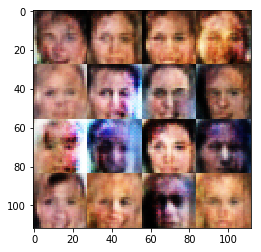

Epoch 1/1    Discriminator Loss:  1.353  Generator Loss:  0.762


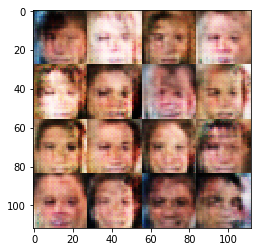

Epoch 1/1    Discriminator Loss:  1.224  Generator Loss:  1.067


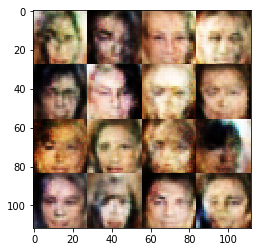

Epoch 1/1    Discriminator Loss:  0.978  Generator Loss:  1.491


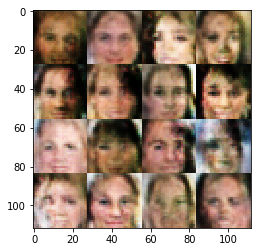

Epoch 1/1    Discriminator Loss:  1.162  Generator Loss:  0.994


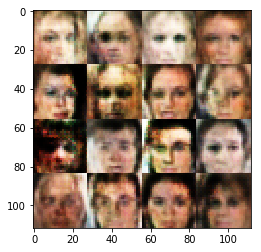

Epoch 1/1    Discriminator Loss:  1.429  Generator Loss:  0.574


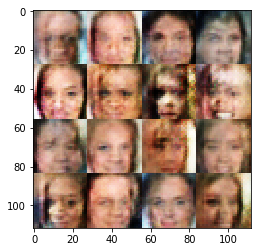

Epoch 1/1    Discriminator Loss:  1.269  Generator Loss:  0.877


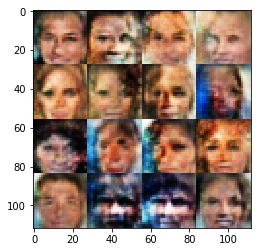

Epoch 1/1    Discriminator Loss:  1.171  Generator Loss:  1.705


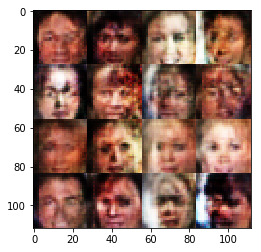

Epoch 1/1    Discriminator Loss:  1.057  Generator Loss:  1.124


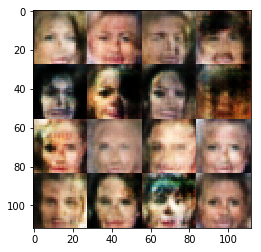

Epoch 1/1    Discriminator Loss:  1.269  Generator Loss:  0.902


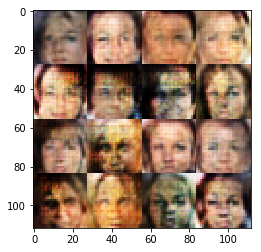

Epoch 1/1    Discriminator Loss:  1.191  Generator Loss:  0.940


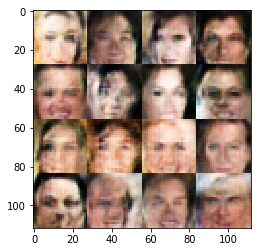

Epoch 1/1    Discriminator Loss:  1.065  Generator Loss:  1.065


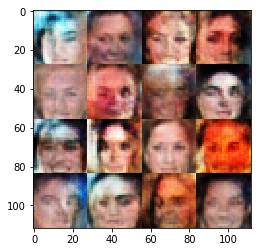

Epoch 1/1    Discriminator Loss:  1.166  Generator Loss:  0.838


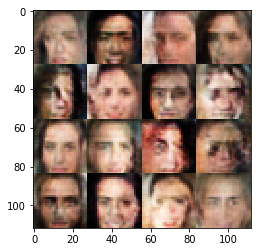

Epoch 1/1    Discriminator Loss:  1.090  Generator Loss:  1.346


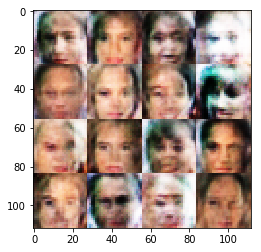

Epoch 1/1    Discriminator Loss:  1.273  Generator Loss:  0.666


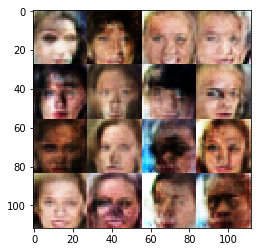

Epoch 1/1    Discriminator Loss:  1.502  Generator Loss:  0.662


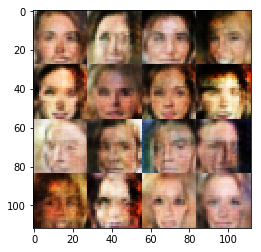

Epoch 1/1    Discriminator Loss:  1.286  Generator Loss:  0.784


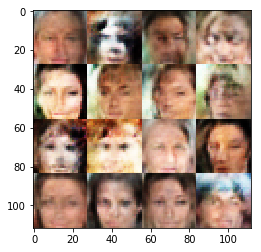

Epoch 1/1    Discriminator Loss:  1.179  Generator Loss:  1.170


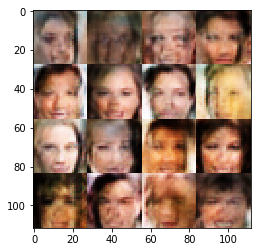

Epoch 1/1    Discriminator Loss:  1.126  Generator Loss:  1.172


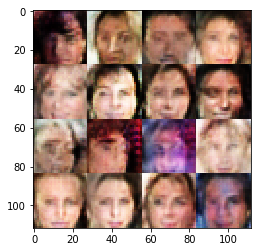

Epoch 1/1    Discriminator Loss:  1.497  Generator Loss:  1.770


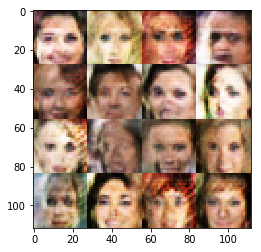

Epoch 1/1    Discriminator Loss:  1.173  Generator Loss:  0.883


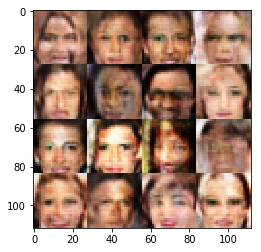

Epoch 1/1    Discriminator Loss:  1.249  Generator Loss:  0.978


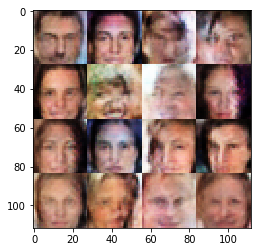

Epoch 1/1    Discriminator Loss:  2.339  Generator Loss:  3.154


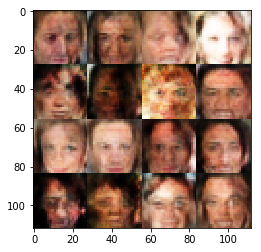

Epoch 1/1    Discriminator Loss:  0.752  Generator Loss:  1.895


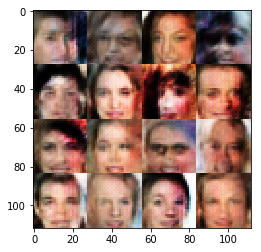

Epoch 1/1    Discriminator Loss:  1.181  Generator Loss:  1.071


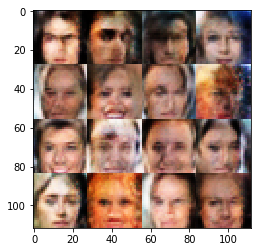

Epoch 1/1    Discriminator Loss:  1.682  Generator Loss:  0.423


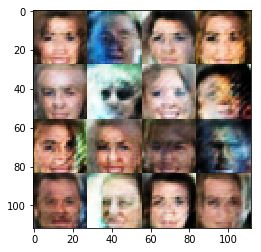

Epoch 1/1    Discriminator Loss:  1.120  Generator Loss:  1.501


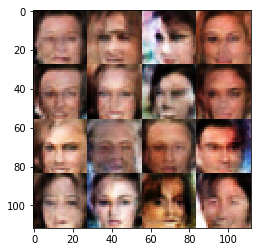

Epoch 1/1    Discriminator Loss:  0.773  Generator Loss:  1.549


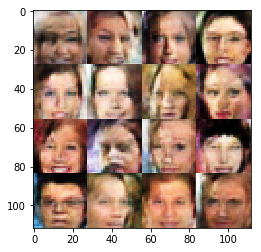

Epoch 1/1    Discriminator Loss:  1.192  Generator Loss:  0.874


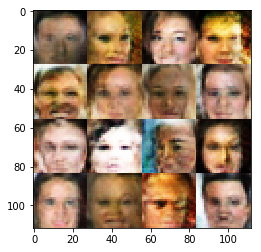

Epoch 1/1    Discriminator Loss:  1.206  Generator Loss:  1.029


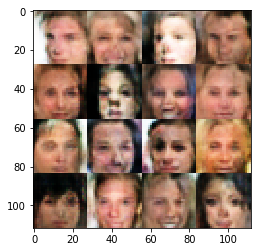

Epoch 1/1    Discriminator Loss:  1.312  Generator Loss:  0.860


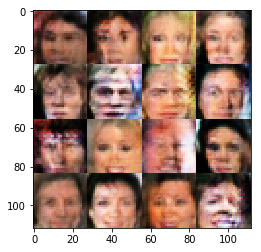

Epoch 1/1    Discriminator Loss:  1.293  Generator Loss:  0.771


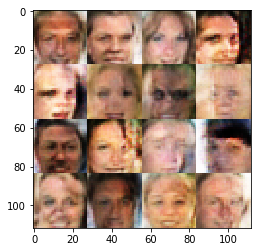

Epoch 1/1    Discriminator Loss:  1.221  Generator Loss:  0.878


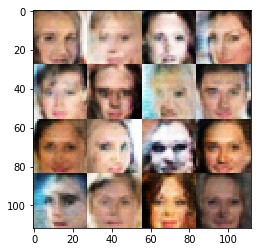

Epoch 1/1    Discriminator Loss:  1.305  Generator Loss:  0.738


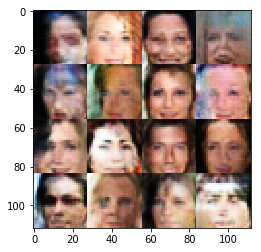

Epoch 1/1    Discriminator Loss:  1.236  Generator Loss:  0.815


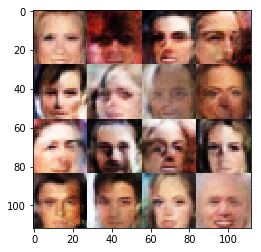

Epoch 1/1    Discriminator Loss:  1.288  Generator Loss:  0.859


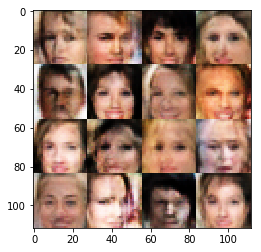

Epoch 1/1    Discriminator Loss:  1.289  Generator Loss:  1.158


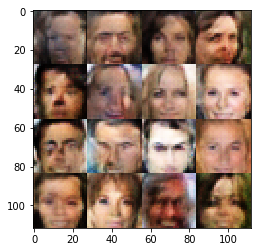

Epoch 1/1    Discriminator Loss:  1.280  Generator Loss:  0.904


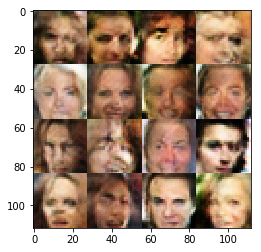

Epoch 1/1    Discriminator Loss:  1.181  Generator Loss:  0.932


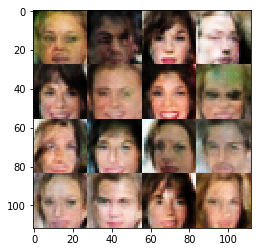

Epoch 1/1    Discriminator Loss:  1.361  Generator Loss:  0.695


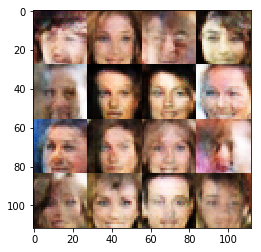

Epoch 1/1    Discriminator Loss:  1.339  Generator Loss:  0.673


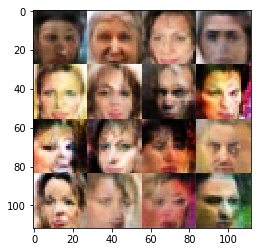

Epoch 1/1    Discriminator Loss:  1.286  Generator Loss:  0.991


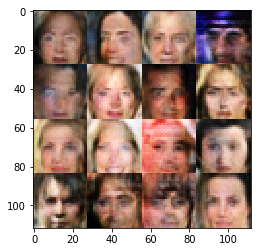

Epoch 1/1    Discriminator Loss:  1.392  Generator Loss:  0.587


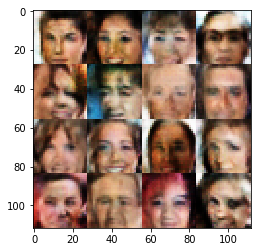

Epoch 1/1    Discriminator Loss:  1.092  Generator Loss:  1.132


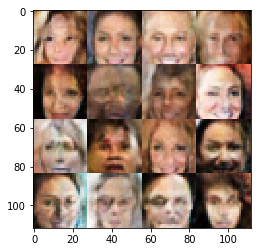

Epoch 1/1    Discriminator Loss:  1.129  Generator Loss:  0.818


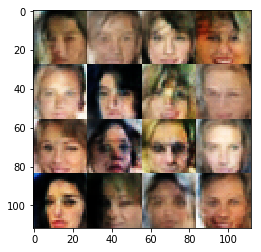

Epoch 1/1    Discriminator Loss:  0.922  Generator Loss:  1.255


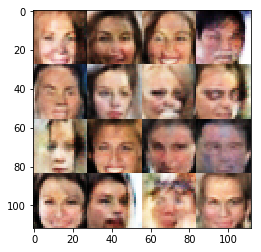

Epoch 1/1    Discriminator Loss:  1.073  Generator Loss:  1.632


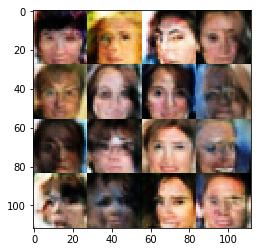

Epoch 1/1    Discriminator Loss:  1.175  Generator Loss:  0.921


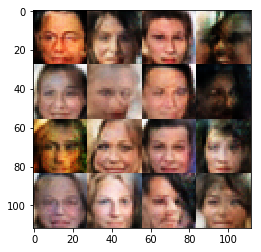

In [28]:
batch_size = 32
z_dim = 128
learning_rate = 0.0008
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.